In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen, HTTPError, URLError
from urllib.parse import urlparse
import re
from concurrent.futures import ThreadPoolExecutor, TimeoutError
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import random


%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

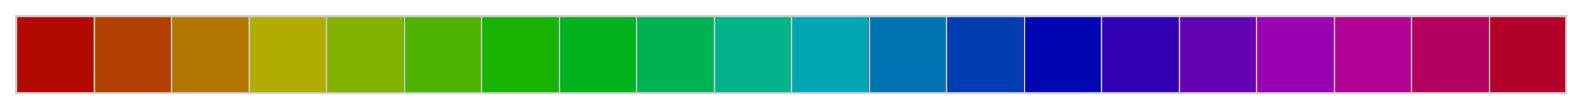

In [28]:
# defino las paletas de colores que usaremos
color_palette = sns.hls_palette(20, l=0.35, s=1)
total_color = color_palette[15]
normal_color = color_palette[9]
disaster_color = color_palette[1]
links_color = color_palette[2]
no_links_color = color_palette[11]
color_palette = sns.palplot(color_palette)

In [21]:
def is_not_nan(value):
    return value == value

In [2]:
twt_data = pd.read_csv('../../../DataSets/twt_train.csv')

In [3]:
twt_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
twt_data.describe()

,id,target
count,"7,613.00","7,613.00"
mean,"5,441.93",0.43
std,"3,137.12",0.50
min,1.00,0.00
25%,"2,734.00",0.00
50%,"5,408.00",0.00
75%,"8,146.00",1.00
max,"10,873.00",1.00


In [5]:
twt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 208.2+ KB


In [6]:
def obtain_link(twt):
    url = re.search("(?P<url>https?://[^\s]+)", twt)
    return url.group("url") if url else np.NaN  

In [7]:
twt_data['link'] = twt_data['text'].map(obtain_link)
twt_data

,id,keyword,location,text,target,link
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,NaN
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,NaN
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,NaN
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,NaN
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,NaN
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,http://t.co/STfMbbZFB5
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,NaN
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,http://t.co/zDtoyd8EbJ
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,NaN


In [8]:
twt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
 5   link      3971 non-null   object
dtypes: int64(2), object(4)
memory usage: 238.0+ KB


In [10]:
def isShorted(link):
    if link != link: return np.NaN 
    return 't.co' in str(link)

In [11]:
twt_data['link_shorted'] = twt_data['link'].map(isShorted)


[Text(0, 0, 'Normalidad'), Text(0, 0, 'Desastre')]

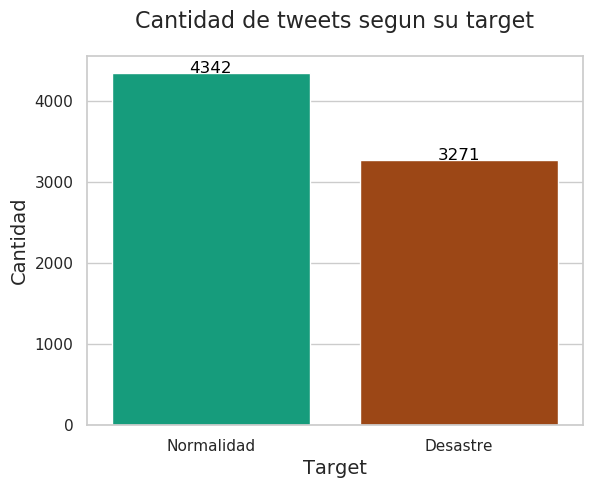

In [20]:
twt_data['for_graphics'] = 1
grouped_twt = twt_data.groupby('target').sum().reset_index()
g = sns.barplot(x='target', y='for_graphics', data=grouped_twt, palette=[normal_color, disaster_color])
for index, row in grouped_twt.iterrows():
    g.text(row.target, row.for_graphics, row.for_graphics, color='black', ha="center")
g.set_title("Cantidad de tweets segun su target", fontsize=16, pad=20)
g.set_xlabel("Momento", fontsize=14)
g.set_ylabel("Cantidad", fontsize=14)
g.set_xticklabels(['Normalidad', 'Desastre'])

[Text(0, 0, 'No'), Text(0, 0, 'Si')]

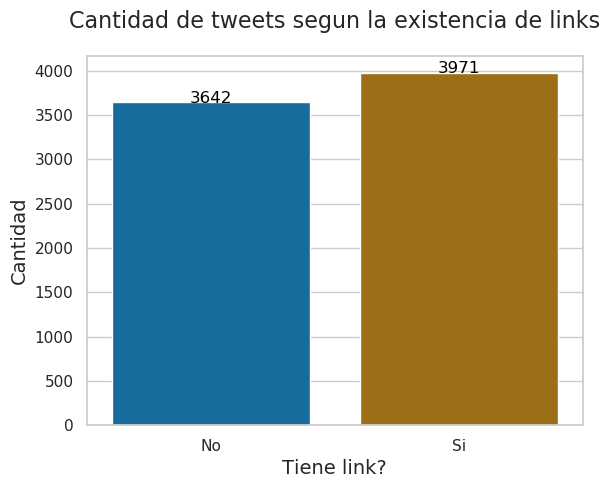

In [30]:
twt_data['with_link'] = twt_data['link'].map(is_not_nan)
grouped_twt = twt_data.groupby('with_link').sum().reset_index()
g = sns.barplot(x='with_link', y='for_graphics', data=grouped_twt, palette=[no_links_color, links_color])
for index, row in grouped_twt.iterrows():
    g.text(row.name, row.for_graphics, row.for_graphics, color='black', ha="center")
g.set_title("Cantidad de tweets segun la existencia de links", fontsize=16, pad=20)
g.set_xlabel("Tiene link?", fontsize=14)
g.set_ylabel("Cantidad", fontsize=14)
g.set_xticklabels(['No', 'Si'])

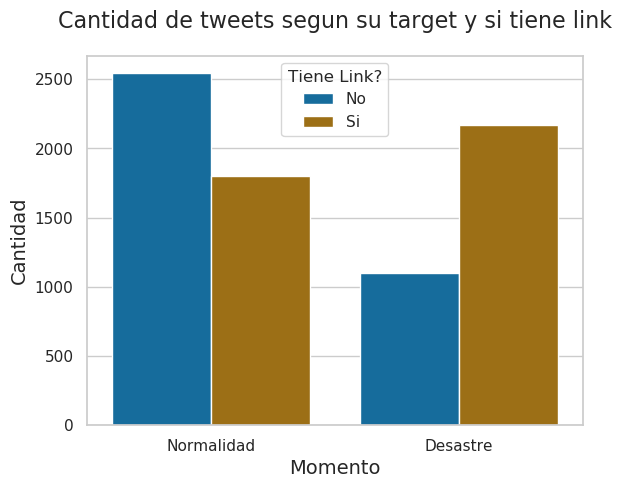

In [64]:
grouped_twt = twt_data.groupby(['target', 'with_link']).sum().reset_index()
grouped_twt.loc[grouped_twt['with_link']==False, 'with_link'] = 'No'
grouped_twt.loc[grouped_twt['with_link']==True, 'with_link'] = 'Si'
g = sns.barplot(x='target', y='for_graphics', hue='with_link', data=grouped_twt, palette=[no_links_color, links_color])
g.set_title("Cantidad de tweets segun su target y si tiene link", fontsize=16, pad=20)
g.set_xlabel("Momento", fontsize=14)
g.set_ylabel("Cantidad", fontsize=14)
g.set_xticklabels(['Normalidad', 'Desastre'])
g.legend(title="Tiene Link?")

In [69]:
grouped_by_target_twt = twt_data.groupby(['target']).sum().reset_index()
grouped_by_links_twt = twt_data.groupby(['target', 'with_link']).sum().reset_index()
grouped_by_links_twt.loc[grouped_by_links_twt['with_link'] == False, 'for_graphics'] = grouped_by_target_twt['for_graphics'].tolist()
grouped_by_links_twt.loc[grouped_by_links_twt['with_link'] == False, 'with_link'] = 'Total'
grouped_by_links_twt.loc[grouped_by_links_twt['with_link'] == True, 'with_link'] = 'Tiene link'
grouped_by_links_twt

,target,with_link,id,for_graphics
0,0,Total,13588868,4342
1,0,Tiene link,9321462,1799
2,1,Total,5894662,3271
3,1,Tiene link,12624458,2172


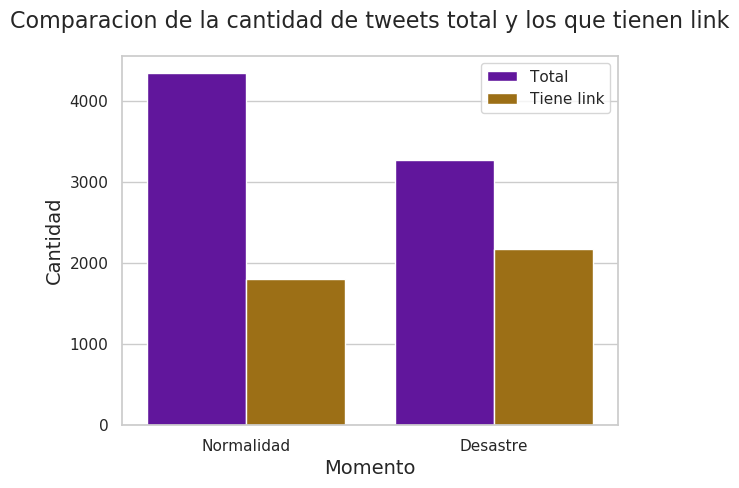

In [74]:
g = sns.barplot(x = 'target', y = 'for_graphics', data=grouped_by_links_twt, hue='with_link', palette=[total_color, links_color])
g.set_title("Comparacion de la cantidad de tweets total y los que tienen link", fontsize=16, pad=20)
g.set_xlabel("Momento", fontsize=14)
g.set_ylabel("Cantidad", fontsize=14)
g.set_xticklabels(['Normalidad', 'Desastre'])
g.legend(title="")

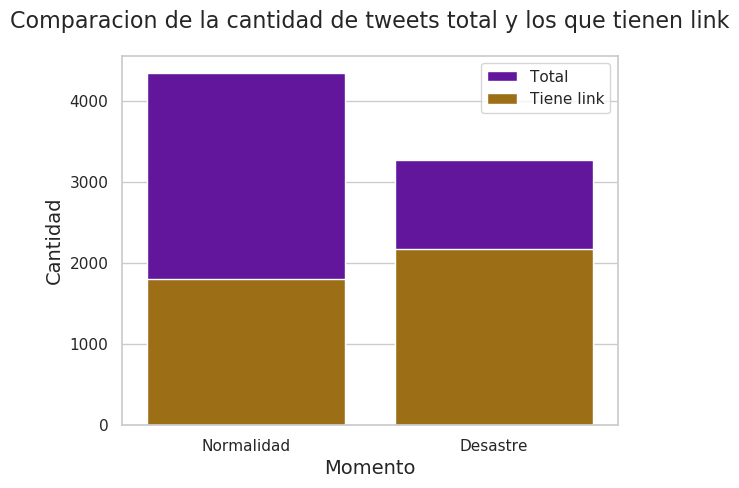

In [77]:
g = sns.barplot(x = 'target', y = 'for_graphics', data=grouped_by_links_twt, hue='with_link',\
                palette=[total_color, links_color], dodge=False)
g.set_title("Comparacion de la cantidad de tweets total y los que tienen link", fontsize=16, pad=20)
g.set_xlabel("Momento", fontsize=14)
g.set_ylabel("Cantidad", fontsize=14)
g.set_xticklabels(['Normalidad', 'Desastre'])
g.legend(title="")

## A continuacion trabajaremos exclusivamente con los twits que poseen links

In [79]:
twt_data_with_links = twt_data.dropna(subset=['link'])
twt_data_with_links = twt_data_with_links[twt_data_with_links['link_shorted']]
twt_data_with_links

,id,keyword,location,text,target,link,link_shorted,for_graphics,with_link
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,http://t.co/lHYXEOHY6C,True,1,True
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,http://t.co/YAo1e0xngw,True,1,True
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,http://t.co/2nndBGwyEi,True,1,True
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,http://t.co/qqsmshaJ3N,True,1,True
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,http://t.co/3ImaomknnA,True,1,True
...,...,...,...,...,...,...,...,...,...
7606,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,http://t.co/nF4IculOje,True,1,True
7607,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,http://t.co/3SICroAaNz,True,1,True
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,http://t.co/STfMbbZFB5,True,1,True
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,http://t.co/zDtoyd8EbJ,True,1,True


In [80]:
twt_data_with_links.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3968 entries, 31 to 7612
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            3968 non-null   int64 
 1   keyword       3948 non-null   object
 2   location      2714 non-null   object
 3   text          3968 non-null   object
 4   target        3968 non-null   int64 
 5   link          3968 non-null   object
 6   link_shorted  3968 non-null   object
 7   for_graphics  3968 non-null   int64 
 8   with_link     3968 non-null   bool  
dtypes: bool(1), int64(3), object(5)
memory usage: 205.4+ KB


In [81]:
twt_data_with_links['real_link'] = 'np.NaN'
twt_data_with_links['error'] = 'np.NaN'
twt_data_with_links['page'] = 'np.NaN'
twt_data_with_links = twt_data_with_links.reset_index()
twt_data_with_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968 entries, 0 to 3967
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         3968 non-null   int64 
 1   id            3968 non-null   int64 
 2   keyword       3948 non-null   object
 3   location      2714 non-null   object
 4   text          3968 non-null   object
 5   target        3968 non-null   int64 
 6   link          3968 non-null   object
 7   link_shorted  3968 non-null   object
 8   for_graphics  3968 non-null   int64 
 9   with_link     3968 non-null   bool  
 10  real_link     3968 non-null   object
 11  error         3968 non-null   object
 12  page          3968 non-null   object
dtypes: bool(1), int64(4), object(8)
memory usage: 251.9+ KB


In [82]:
def obtain_real_link(index, url):
    try:
        with urlopen(url, timeout = 20) as response:
            actual_url = response.geturl()
            error = np.NaN
            page = response.read()
    except HTTPError as e:
        actual_url = e.url
        error = e
        page = np.NaN
    except URLError as e:
        actual_url = url
        error = e
        page = np.NaN
    except:
        actual_url = url
        error = 'OTHER_ERROR'
        page = np.NaN
    return (index, actual_url, error, page)

In [83]:
def doWork(row):
    return obtain_real_link(row[0], row[1]['link'])

In [85]:
twt_data_with_links = pd.read_csv('../../../DataSets/twt_with_links.csv').drop(columns=['Unnamed: 0'])
twt_data_with_links

,id,keyword,location,text,target,link,link_shorted,real_link,error,page,error_code
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,http://t.co/lHYXEOHY6C,True,https://twitter.com/dannypurewal/status/629284...,HTTP Error 404: Not Found,NaN,404.00
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,http://t.co/YAo1e0xngw,True,https://twitter.com/Valis_Ablaze/status/629274...,NaN,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,http://t.co/2nndBGwyEi,True,https://africanbaze.com/breaking-newsnigeria-f...,HTTP Error 404: Not Found,NaN,404.00
3,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,http://t.co/qqsmshaJ3N,True,https://twitter.com/AnyOtherAnnaK/status/62919...,NaN,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan
4,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,http://t.co/3ImaomknnA,True,http://yabaleftonline.com/2015/08/inec-office-...,HTTP Error 403: Forbidden,NaN,403.00
...,...,...,...,...,...,...,...,...,...,...,...
3963,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,http://t.co/nF4IculOje,True,https://www.reuters.com/article/us-saudi-secur...,NaN,b'<!--[if !IE]> This has been served from cach...,nan
3964,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,http://t.co/3SICroAaNz,True,http://t.co/3SICroAaNz,<urlopen error [Errno -2] Name or service not ...,NaN,nan
3965,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,http://t.co/STfMbbZFB5,True,https://gizmodo.com/two-giant-cranes-holding-a...,NaN,"b'<!DOCTYPE html><html lang=""en-us"" data-react...",nan
3966,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,http://t.co/zDtoyd8EbJ,True,https://earthquake.usgs.gov/earthquakes/eventp...,NaN,"b'<!doctype html>\n<html lang=""en"">\n\n<head>\...",nan


In [86]:
twt_data_with_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3968 entries, 0 to 3967
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            3968 non-null   int64  
 1   keyword       3948 non-null   object 
 2   location      2714 non-null   object 
 3   text          3968 non-null   object 
 4   target        3968 non-null   int64  
 5   link          3968 non-null   object 
 6   link_shorted  3968 non-null   bool   
 7   real_link     3968 non-null   object 
 8   error         1758 non-null   object 
 9   page          2214 non-null   object 
 10  error_code    1386 non-null   float64
dtypes: bool(1), float64(1), int64(2), object(7)
memory usage: 205.4+ KB


In [87]:
twt_data_with_links['site'] = twt_data_with_links['real_link'].map(lambda x: urlparse(x).netloc)
twt_data_with_links

,id,keyword,location,text,target,link,link_shorted,real_link,error,page,error_code,site
0,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,http://t.co/lHYXEOHY6C,True,https://twitter.com/dannypurewal/status/629284...,HTTP Error 404: Not Found,NaN,404.00,twitter.com
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,http://t.co/YAo1e0xngw,True,https://twitter.com/Valis_Ablaze/status/629274...,NaN,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan,twitter.com
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,http://t.co/2nndBGwyEi,True,https://africanbaze.com/breaking-newsnigeria-f...,HTTP Error 404: Not Found,NaN,404.00,africanbaze.com
3,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,http://t.co/qqsmshaJ3N,True,https://twitter.com/AnyOtherAnnaK/status/62919...,NaN,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan,twitter.com
4,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,http://t.co/3ImaomknnA,True,http://yabaleftonline.com/2015/08/inec-office-...,HTTP Error 403: Forbidden,NaN,403.00,yabaleftonline.com
...,...,...,...,...,...,...,...,...,...,...,...,...
3963,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,http://t.co/nF4IculOje,True,https://www.reuters.com/article/us-saudi-secur...,NaN,b'<!--[if !IE]> This has been served from cach...,nan,www.reuters.com
3964,10867,NaN,NaN,#stormchase Violent Record Breaking EF-5 El Re...,1,http://t.co/3SICroAaNz,True,http://t.co/3SICroAaNz,<urlopen error [Errno -2] Name or service not ...,NaN,nan,t.co
3965,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,http://t.co/STfMbbZFB5,True,https://gizmodo.com/two-giant-cranes-holding-a...,NaN,"b'<!DOCTYPE html><html lang=""en-us"" data-react...",nan,gizmodo.com
3966,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,http://t.co/zDtoyd8EbJ,True,https://earthquake.usgs.gov/earthquakes/eventp...,NaN,"b'<!doctype html>\n<html lang=""en"">\n\n<head>\...",nan,earthquake.usgs.gov


In [88]:
twt_data_with_links['for_graphics'] = 1
grouped_by_sites = twt_data_with_links.groupby('site').sum()
grouped_by_sites

,id,target,link_shorted,error_code,for_graphics
site,,,,,
,21300,1,4.00,0.00,4
1.usa.gov,125663,13,15.00,"6,060.00",15
1080plus.com,1770,1,1.00,403.00,1
1stheadlines.com,10628,1,1.00,403.00,1
24x7freeadvice.wordpress.com,7843,0,1.00,410.00,1
...,...,...,...,...,...
yournewswire.com,14239,1,2.00,806.00,2
youthsnews.com.au,275378,15,40.00,0.00,40
zeenews.india.com,12563,2,2.00,806.00,2


Text(0, 0.5, 'Sitios')

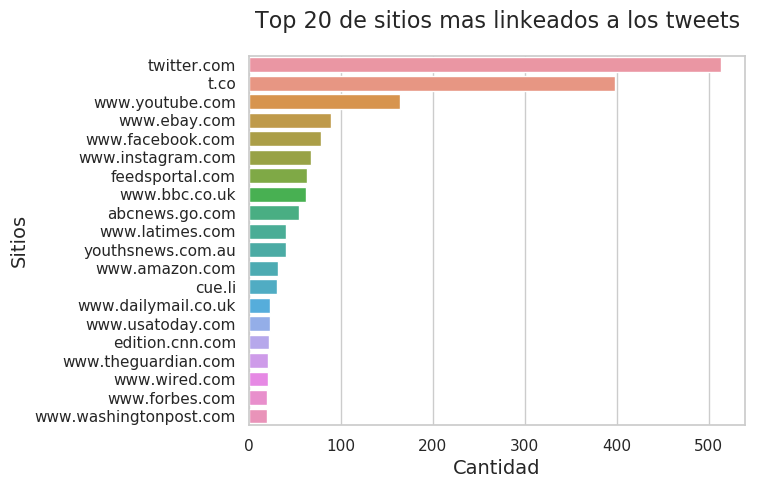

In [89]:
sites_top_20 = grouped_by_sites.sort_values('for_graphics', ascending=False).head(20).reset_index()
g = sns.barplot(x = 'for_graphics', y = 'site', data=sites_top_20)
g.set_title("Top 20 de sitios mas linkeados a los tweets", fontsize=16, pad=20)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Sitios", fontsize=14)

### Dejaremos afuera el sition t.co y las lineas que tienen como sitio twitter.com y su respuesta fue un error

In [90]:
def filter_twitter_error(row):
    return row.site != 't.co' and (row.site != 'twitter.com' or row.error != row.error)

In [91]:
filter_list = []
for index, row in twt_data_with_links.iterrows():
    filter_list.append(filter_twitter_error(row))
twt_data_with_links.loc[filter_list]

,id,keyword,location,text,target,link,link_shorted,real_link,error,page,error_code,site,for_graphics
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,http://t.co/YAo1e0xngw,True,https://twitter.com/Valis_Ablaze/status/629274...,NaN,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan,twitter.com,1
2,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,http://t.co/2nndBGwyEi,True,https://africanbaze.com/breaking-newsnigeria-f...,HTTP Error 404: Not Found,NaN,404.00,africanbaze.com,1
3,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,http://t.co/qqsmshaJ3N,True,https://twitter.com/AnyOtherAnnaK/status/62919...,NaN,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan,twitter.com,1
4,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze - http://t.co/3...,1,http://t.co/3ImaomknnA,True,http://yabaleftonline.com/2015/08/inec-office-...,HTTP Error 403: Forbidden,NaN,403.00,yabaleftonline.com,1
5,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,http://t.co/wDUEaj8Q4J,True,https://www.youtube.com/watch?v=yG08hLEWzyM,NaN,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,www.youtube.com,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3962,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,http://t.co/EYSVvzA7Qm,True,https://www.youtube.com/watch?v=yG08hLEWzyM&3,NaN,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,www.youtube.com,1
3963,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,http://t.co/nF4IculOje,True,https://www.reuters.com/article/us-saudi-secur...,NaN,b'<!--[if !IE]> This has been served from cach...,nan,www.reuters.com,1
3965,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,http://t.co/STfMbbZFB5,True,https://gizmodo.com/two-giant-cranes-holding-a...,NaN,"b'<!DOCTYPE html><html lang=""en-us"" data-react...",nan,gizmodo.com,1
3966,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,http://t.co/zDtoyd8EbJ,True,https://earthquake.usgs.gov/earthquakes/eventp...,NaN,"b'<!doctype html>\n<html lang=""en"">\n\n<head>\...",nan,earthquake.usgs.gov,1


Text(0, 0.5, 'Sitios')

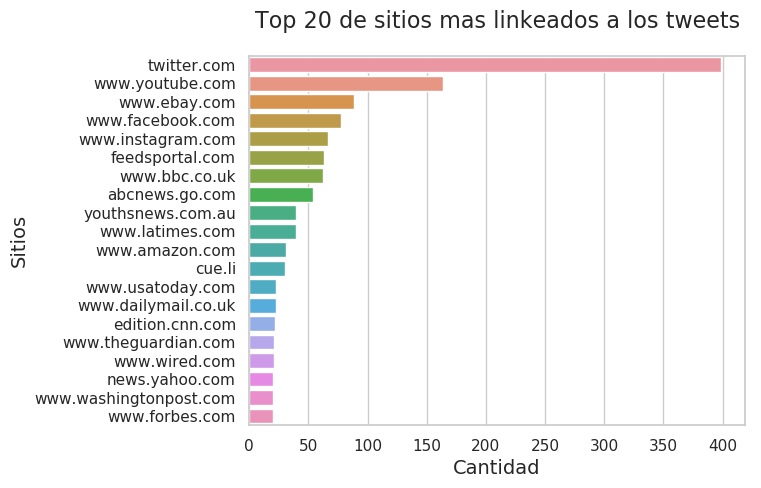

In [92]:
sites_top_20_filtered = twt_data_with_links.loc[filter_list].groupby('site').sum()\
    .sort_values('for_graphics', ascending=False).head(20).reset_index()
g = sns.barplot(x = 'for_graphics', y = 'site', data=sites_top_20_filtered)
g.set_title("Top 20 de sitios mas linkeados a los tweets", fontsize=16, pad=20)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Sitios", fontsize=14)

Text(0, 0.5, 'Sitios')

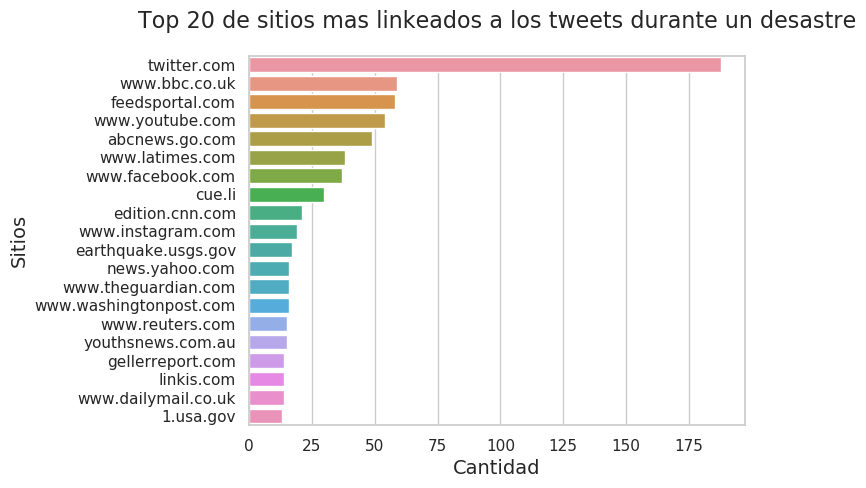

In [95]:
sites_top_20_filtered = twt_data_with_links.loc[filter_list].loc[twt_data_with_links['target']==1].groupby('site')\
    .sum().sort_values('for_graphics', ascending=False).head(20).reset_index()
g = sns.barplot(x = 'for_graphics', y = 'site', data=sites_top_20_filtered)
g.set_title("Top 20 de sitios mas linkeados a los tweets durante un desastre", fontsize=16, pad=20)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Sitios", fontsize=14)

Text(0, 0.5, 'Sitios')

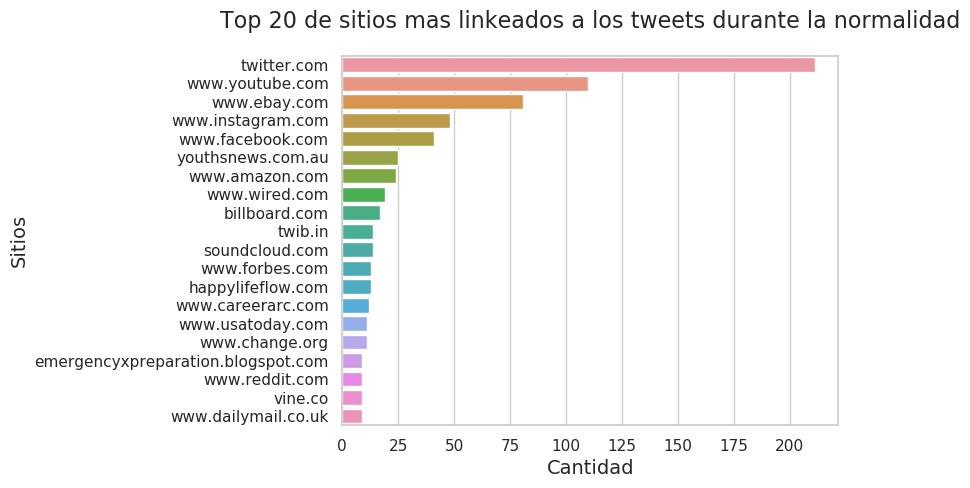

In [96]:
sites_top_20_filtered = twt_data_with_links.loc[filter_list].loc[twt_data_with_links['target']==0].groupby('site')\
    .sum().sort_values('for_graphics', ascending=False).head(20).reset_index()
g = sns.barplot(x = 'for_graphics', y = 'site', data=sites_top_20_filtered)
g.set_title("Top 20 de sitios mas linkeados a los tweets durante la normalidad", fontsize=16, pad=20)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Sitios", fontsize=14)

Text(0.5, 0, 'Cantidad de apariciones')

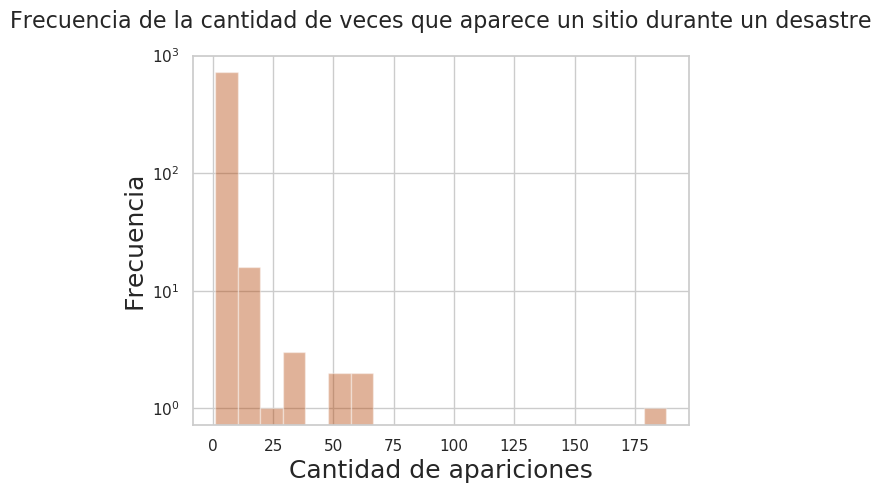

In [108]:
sites = twt_data_with_links.loc[filter_list].loc[twt_data_with_links['target']==1].groupby('site')\
    .sum().reset_index()
g = sns.distplot(sites['for_graphics'], hist=True, kde=False, bins=20, color=disaster_color)
g.set_title('Frecuencia de la cantidad de veces que aparece un sitio durante un desastre',\
            fontsize=16, pad=20)
g.set_ylabel('Frecuencia', fontsize=18)
g.set_yscale('log')
g.set_xlabel('Cantidad de apariciones', fontsize=18)

Text(0.5, 0, 'Cantidad de apariciones')

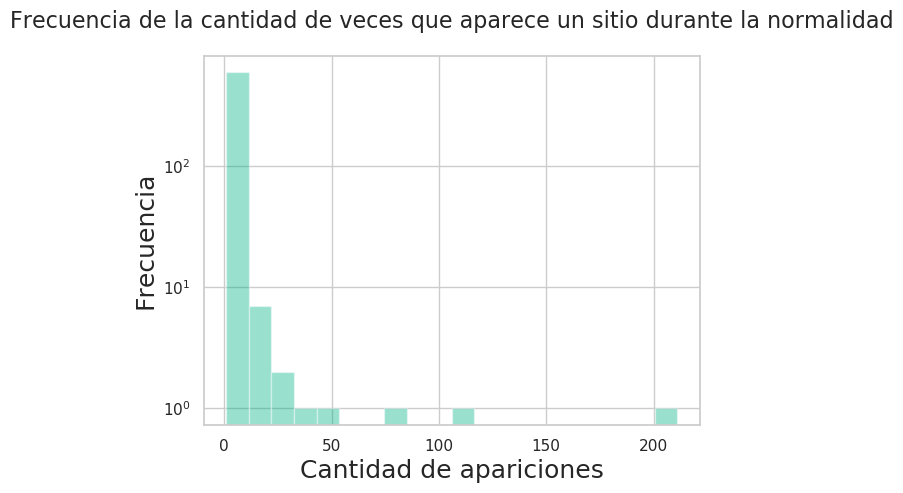

In [107]:
sites = twt_data_with_links.loc[filter_list].loc[twt_data_with_links['target']==0].groupby('site')\
    .sum().reset_index()
g = sns.distplot(sites['for_graphics'], hist=True, kde=False, bins=20, color=normal_color)
g.set_title('Frecuencia de la cantidad de veces que aparece un sitio durante la normalidad',\
            fontsize=16, pad=20)
g.set_ylabel('Frecuencia', fontsize=18)
g.set_yscale('log')
g.set_xlabel('Cantidad de apariciones', fontsize=18)

## A continuacion nos quedaremos exclusivamente con las lineas sin errores para analizar las paguinas

In [111]:
twt_data_without_error = twt_data_with_links.loc[twt_data_with_links['error'] != twt_data_with_links['error']]
twt_data_without_error

,id,keyword,location,text,target,link,link_shorted,real_link,error,page,error_code,site,for_graphics
1,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,http://t.co/YAo1e0xngw,True,https://twitter.com/Valis_Ablaze/status/629274...,NaN,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan,twitter.com,1
3,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,http://t.co/qqsmshaJ3N,True,https://twitter.com/AnyOtherAnnaK/status/62919...,NaN,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan,twitter.com,1
5,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,http://t.co/wDUEaj8Q4J,True,https://www.youtube.com/watch?v=yG08hLEWzyM,NaN,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,www.youtube.com,1
6,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,http://t.co/rOI2NSmEJJ,True,https://www.freewebcamsex.me/2015-02-02-taking...,NaN,b'\r\n<!DOCTYPE html><html><head><title>Hot Ch...,nan,www.freewebcamsex.me,1
7,64,ablaze,NaN,I wanted to set Chicago ablaze with my preachi...,0,http://t.co/o9qknbfOFX,True,https://twitter.com/RevDominic/status/62927230...,NaN,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan,twitter.com,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been ...,1,http://t.co/5ueCmcv2Pk,True,https://www.latimes.com/local/lanow/la-me-ln-r...,NaN,"b'<!DOCTYPE html>\n<html class=""ArticlePage"" l...",nan,www.latimes.com,1
3962,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,http://t.co/EYSVvzA7Qm,True,https://www.youtube.com/watch?v=yG08hLEWzyM&3,NaN,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,www.youtube.com,1
3963,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,http://t.co/nF4IculOje,True,https://www.reuters.com/article/us-saudi-secur...,NaN,b'<!--[if !IE]> This has been served from cach...,nan,www.reuters.com,1
3965,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,http://t.co/STfMbbZFB5,True,https://gizmodo.com/two-giant-cranes-holding-a...,NaN,"b'<!DOCTYPE html><html lang=""en-us"" data-react...",nan,gizmodo.com,1


In [112]:
def get_the_header(page):
    soup = BeautifulSoup(page, "lxml")
    header = str(soup.h1.string) if soup.h1 else ''
    soup.decompose()
    return header

In [114]:
twt_data_without_error = pd.read_csv('../../../DataSets/twt_with_header.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
twt_data_without_error

,id,keyword,location,text,target,link,link_shorted,real_link,error,page,error_code,header
0,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy. #metal #RT h...,0,http://t.co/YAo1e0xngw,True,https://twitter.com/Valis_Ablaze/status/629274...,nan,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan,None
1,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS...,0,http://t.co/qqsmshaJ3N,True,https://twitter.com/AnyOtherAnnaK/status/62919...,nan,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan,None
2,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,http://t.co/wDUEaj8Q4J,True,https://www.youtube.com/watch?v=yG08hLEWzyM,nan,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,\n This video is unavailable.\n\n...
3,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,http://t.co/rOI2NSmEJJ,True,https://www.freewebcamsex.me/2015-02-02-taking...,nan,b'\r\n<!DOCTYPE html><html><head><title>Hot Ch...,nan,Real Webcam Babes Performing in Hot Live Cam S...
4,64,ablaze,NaN,I wanted to set Chicago ablaze with my preachi...,0,http://t.co/o9qknbfOFX,True,https://twitter.com/RevDominic/status/62927230...,nan,"b'<!DOCTYPE html>\n<html lang=""es"" data-scribe...",nan,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2205,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been ...,1,http://t.co/5ueCmcv2Pk,True,https://www.latimes.com/local/lanow/la-me-ln-r...,nan,"b'<!DOCTYPE html>\n<html class=""ArticlePage"" l...",nan,\n Refugio oil spill may have been cost...
2206,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,http://t.co/EYSVvzA7Qm,True,https://www.youtube.com/watch?v=yG08hLEWzyM&3,nan,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,\n This video is unavailable.\n\n...
2207,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,http://t.co/nF4IculOje,True,https://www.reuters.com/article/us-saudi-secur...,nan,b'<!--[if !IE]> This has been served from cach...,nan,Suicide bomber kills 15 in Saudi security site...
2208,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,http://t.co/STfMbbZFB5,True,https://gizmodo.com/two-giant-cranes-holding-a...,nan,"b'<!DOCTYPE html><html lang=""en-us"" data-react...",nan,Two giant cranes holding a bridge collapse int...


In [116]:
twt_data_without_error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2210 entries, 0 to 2209
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2210 non-null   int64  
 1   keyword       2198 non-null   object 
 2   location      1598 non-null   object 
 3   text          2210 non-null   object 
 4   target        2210 non-null   int64  
 5   link          2210 non-null   object 
 6   link_shorted  2210 non-null   bool   
 7   real_link     2210 non-null   object 
 8   error         0 non-null      float64
 9   page          2210 non-null   object 
 10  error_code    0 non-null      float64
 11  header        1789 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 131.7+ KB


## A continuacion nos quedaremos exclusivamente paguinas que nos devolvieron un header para analizar el mismo

In [121]:
twt_data_without_error = twt_data_without_error.loc[twt_data_without_error["header"] != 'None']
twt_data_without_error = twt_data_without_error.loc[twt_data_without_error["header"] != '']
twt_data_without_error = twt_data_without_error.loc[twt_data_without_error["header"] == twt_data_without_error["header"]]
twt_data_without_error

,id,keyword,location,text,target,link,link_shorted,real_link,error,page,error_code,header
2,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,http://t.co/wDUEaj8Q4J,True,https://www.youtube.com/watch?v=yG08hLEWzyM,nan,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,\n this video is unavailable.\n\n
3,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,http://t.co/rOI2NSmEJJ,True,https://www.freewebcamsex.me/2015-02-02-taking...,nan,b'\r\n<!DOCTYPE html><html><head><title>Hot Ch...,nan,real webcam babes performing in hot live cam s...
6,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfire...,1,http://t.co/vl5TBR3wbr,True,https://mashable.com/2015/08/04/how-the-west-w...,nan,b'<!DOCTYPE html>\n<html data-env=\'production...,nan,how the west was burned: thousands of wildfire...
7,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,http://t.co/rOI2NSmEJJ,True,https://www.freewebcamsex.me/2015-02-02-taking...,nan,b'\r\n<!DOCTYPE html><html><head><title>Hot Ch...,nan,real webcam babes performing in hot live cam s...
8,73,ablaze,"Sheffield Township, Ohio",Deputies: Man shot before Brighton home set ab...,1,http://t.co/gWNRhMSO8k,True,https://chroniclet.com/?utm_source=twitterfeed...,nan,"b'\r\n\r\n<!DOCTYPE html>\r\n<html id=""ctl00_m...",nan,\r\n elyria and lorain county newspaper |...
...,...,...,...,...,...,...,...,...,...,...,...,...
2201,10844,NaN,NaN,SEVERE WEATHER BULLETIN No. 5 FOR: TYPHOON ÛÏ...,1,http://t.co/tHhjJw51PE,True,https://www.facebook.com/PAGASA.DOST.GOV.PH/po...,nan,"b'<!DOCTYPE html>\n<html lang=""en"" id=""faceboo...",nan,facebook
2205,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been ...,1,http://t.co/5ueCmcv2Pk,True,https://www.latimes.com/local/lanow/la-me-ln-r...,nan,"b'<!DOCTYPE html>\n<html class=""ArticlePage"" l...",nan,\n refugio oil spill may have been cost...
2206,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,http://t.co/EYSVvzA7Qm,True,https://www.youtube.com/watch?v=yG08hLEWzyM&3,nan,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,\n this video is unavailable.\n\n
2207,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,http://t.co/nF4IculOje,True,https://www.reuters.com/article/us-saudi-secur...,nan,b'<!--[if !IE]> This has been served from cach...,nan,suicide bomber kills 15 in saudi security site...


In [123]:
#repeticion_de_palabras
twt_data_without_error["header"] = twt_data_without_error["header"].str.lower().str.strip() #transformo todas las palabras a minuscula
twt_data_without_error["header"] = twt_data_without_error["header"].apply(lambda x: re.sub(r'[^\w]', ' ', x)) #quito todos los caracteres no alfanumericos
twt_data_without_error["header"] = twt_data_without_error["header"].apply(lambda x: re.sub(r'_', ' ', x))
twt_data_without_error["header"] = twt_data_without_error["header"].apply(lambda x: re.sub(r'[0-9]',' ', x)) #quito los caracteres numericos
twt_data_without_error["header"] = twt_data_without_error["header"].apply(lambda s: re.sub(r'\b\w{1}\b', '', s)) #quito las letras sueltas
twt_data_without_error["header"] = twt_data_without_error["header"].apply(lambda x: re.sub(' +',' ', x)) #quito los espacios de mas
twt_data_without_error["header"] = twt_data_without_error["header"].apply(lambda s: re.sub(r'\b\w{1,2}\b', '', s)) #quito las palabras cortas
twt_data_without_error

,id,keyword,location,text,target,link,link_shorted,real_link,error,page,error_code,header
2,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,http://t.co/wDUEaj8Q4J,True,https://www.youtube.com/watch?v=yG08hLEWzyM,nan,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,this video unavailable
3,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,http://t.co/rOI2NSmEJJ,True,https://www.freewebcamsex.me/2015-02-02-taking...,nan,b'\r\n<!DOCTYPE html><html><head><title>Hot Ch...,nan,real webcam babes performing hot live cam shows
6,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfire...,1,http://t.co/vl5TBR3wbr,True,https://mashable.com/2015/08/04/how-the-west-w...,nan,b'<!DOCTYPE html>\n<html data-env=\'production...,nan,how the west was burned thousands wildfires ab...
7,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,http://t.co/rOI2NSmEJJ,True,https://www.freewebcamsex.me/2015-02-02-taking...,nan,b'\r\n<!DOCTYPE html><html><head><title>Hot Ch...,nan,real webcam babes performing hot live cam shows
8,73,ablaze,"Sheffield Township, Ohio",Deputies: Man shot before Brighton home set ab...,1,http://t.co/gWNRhMSO8k,True,https://chroniclet.com/?utm_source=twitterfeed...,nan,"b'\r\n\r\n<!DOCTYPE html>\r\n<html id=""ctl00_m...",nan,elyria and lorain county newspaper title
...,...,...,...,...,...,...,...,...,...,...,...,...
2201,10844,NaN,NaN,SEVERE WEATHER BULLETIN No. 5 FOR: TYPHOON ÛÏ...,1,http://t.co/tHhjJw51PE,True,https://www.facebook.com/PAGASA.DOST.GOV.PH/po...,nan,"b'<!DOCTYPE html>\n<html lang=""en"" id=""faceboo...",nan,facebook
2205,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been ...,1,http://t.co/5ueCmcv2Pk,True,https://www.latimes.com/local/lanow/la-me-ln-r...,nan,"b'<!DOCTYPE html>\n<html class=""ArticlePage"" l...",nan,refugio oil spill may have been costlier bigge...
2206,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,http://t.co/EYSVvzA7Qm,True,https://www.youtube.com/watch?v=yG08hLEWzyM&3,nan,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,this video unavailable
2207,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,http://t.co/nF4IculOje,True,https://www.reuters.com/article/us-saudi-secur...,nan,b'<!--[if !IE]> This has been served from cach...,nan,suicide bomber kills saudi security site mosque


In [125]:
twt_data_without_error['header_splited'] = twt_data_without_error['header'].str.split(' ')
twt_data_without_error

,id,keyword,location,text,target,link,link_shorted,real_link,error,page,error_code,header,header_splited
2,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,http://t.co/wDUEaj8Q4J,True,https://www.youtube.com/watch?v=yG08hLEWzyM,nan,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,this video unavailable,"[this, video, unavailable]"
3,59,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,http://t.co/rOI2NSmEJJ,True,https://www.freewebcamsex.me/2015-02-02-taking...,nan,b'\r\n<!DOCTYPE html><html><head><title>Hot Ch...,nan,real webcam babes performing hot live cam shows,"[real, webcam, babes, performing, hot, live, c..."
6,66,ablaze,"GREENSBORO,NORTH CAROLINA",How the West was burned: Thousands of wildfire...,1,http://t.co/vl5TBR3wbr,True,https://mashable.com/2015/08/04/how-the-west-w...,nan,b'<!DOCTYPE html>\n<html data-env=\'production...,nan,how the west was burned thousands wildfires ab...,"[how, the, west, was, burned, thousands, wildf..."
7,68,ablaze,Live On Webcam,Check these out: http://t.co/rOI2NSmEJJ http:/...,0,http://t.co/rOI2NSmEJJ,True,https://www.freewebcamsex.me/2015-02-02-taking...,nan,b'\r\n<!DOCTYPE html><html><head><title>Hot Ch...,nan,real webcam babes performing hot live cam shows,"[real, webcam, babes, performing, hot, live, c..."
8,73,ablaze,"Sheffield Township, Ohio",Deputies: Man shot before Brighton home set ab...,1,http://t.co/gWNRhMSO8k,True,https://chroniclet.com/?utm_source=twitterfeed...,nan,"b'\r\n\r\n<!DOCTYPE html>\r\n<html id=""ctl00_m...",nan,elyria and lorain county newspaper title,"[elyria, and, lorain, county, newspaper, title]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,10844,NaN,NaN,SEVERE WEATHER BULLETIN No. 5 FOR: TYPHOON ÛÏ...,1,http://t.co/tHhjJw51PE,True,https://www.facebook.com/PAGASA.DOST.GOV.PH/po...,nan,"b'<!DOCTYPE html>\n<html lang=""en"" id=""faceboo...",nan,facebook,[facebook]
2205,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been ...,1,http://t.co/5ueCmcv2Pk,True,https://www.latimes.com/local/lanow/la-me-ln-r...,nan,"b'<!DOCTYPE html>\n<html class=""ArticlePage"" l...",nan,refugio oil spill may have been costlier bigge...,"[refugio, oil, spill, may, have, been, costlie..."
2206,10863,NaN,NaN,#WorldNews Fallen powerlines on G:link tram: U...,1,http://t.co/EYSVvzA7Qm,True,https://www.youtube.com/watch?v=yG08hLEWzyM&3,nan,"b'<!DOCTYPE html><html lang=""en"" data-cast-api...",nan,this video unavailable,"[this, video, unavailable]"
2207,10866,NaN,NaN,Suicide bomber kills 15 in Saudi security site...,1,http://t.co/nF4IculOje,True,https://www.reuters.com/article/us-saudi-secur...,nan,b'<!--[if !IE]> This has been served from cach...,nan,suicide bomber kills saudi security site mosque,"[suicide, bomber, kills, saudi, security, site..."


In [126]:
list_stopwords = ["the","and","you","for","that","with","this","from","are","have","was","like","but","just","not","your",\
                 "all","after","will","can","has","when","they","get","new","now","what","amp","","http","https","out",\
                 "more","about","how","there","don","over","into","than","would","been","her","who","were","some","still",\
                 "his","back","why","them","got","know","had","see","going","our","htt","via","nws","wait",\
                 "hwy","top","both","hah","haha","getting","far","near", "video", "unavailable", "is"]
def count_words(word, count):
    if(word in list_stopwords):
        return
    if (word in count):
        count[word] = count[word] + 1
        return
    count[word] = 1

In [131]:
total_word_count = {}
twt_data_without_error['header_splited'].map(
    lambda x: [count_words(word, total_word_count) for word in x]
)
total_word_count

{'real': 6,
 'webcam': 2,
 'babes': 2,
 'performing': 2,
 'hot': 4,
 'live': 5,
 'cam': 2,
 'shows': 4,
 'west': 7,
 'burned': 4,
 'thousands': 5,
 'wildfires': 5,
 'ablaze': 2,
 'california': 36,
 'alone': 2,
 'elyria': 1,
 'lorain': 1,
 'county': 7,
 'newspaper': 1,
 'title': 3,
 'facebook': 63,
 'san': 1,
 'francisco': 1,
 'traffic': 5,
 'report': 2,
 'personal': 1,
 'injury': 3,
 'lawyer': 1,
 'sleep': 1,
 'blog': 8,
 'big': 3,
 'rig': 1,
 'overturns': 2,
 'fort': 2,
 'worth': 1,
 'interstate': 1,
 'columbus': 2,
 'aashiqui': 1,
 'actress': 1,
 'anu': 1,
 'aggarwal': 1,
 'fatal': 3,
 'accident': 2,
 'icemoon': 7,
 'aftershock': 8,
 'these': 3,
 'five': 4,
 'minute': 1,
 'daily': 1,
 'habits': 1,
 'seriously': 1,
 'improve': 1,
 'life': 6,
 'protect': 1,
 'yourself': 1,
 'profit': 1,
 'next': 2,
 'global': 3,
 'financial': 3,
 'meltdown': 2,
 'cindy': 1,
 'spitzer': 1,
 'david': 2,
 'wiedemer': 2,
 'robert': 1,
 'hardcover': 1,
 'reunion': 11,
 'island': 11,
 'wing': 11,
 'debris': 

In [130]:
disaster_word_count = {}
twt_data_without_error.loc[twt_data_without_error['target'] == 1,'header_splited'].map(
    lambda x: [count_words(word, disaster_word_count) for word in x] if (x != None) else None
)
disaster_word_count

{'west': 6,
 'burned': 3,
 'thousands': 4,
 'wildfires': 5,
 'ablaze': 2,
 'california': 34,
 'alone': 2,
 'elyria': 1,
 'lorain': 1,
 'county': 6,
 'newspaper': 1,
 'title': 3,
 'san': 1,
 'francisco': 1,
 'traffic': 5,
 'report': 2,
 'facebook': 26,
 'big': 2,
 'rig': 1,
 'overturns': 2,
 'fort': 1,
 'worth': 1,
 'interstate': 1,
 'columbus': 1,
 'aashiqui': 1,
 'actress': 1,
 'anu': 1,
 'aggarwal': 1,
 'fatal': 3,
 'accident': 2,
 'reunion': 11,
 'island': 11,
 'wing': 11,
 'debris': 16,
 'flight': 10,
 'malaysia': 9,
 'prime': 7,
 'minister': 8,
 'says': 25,
 'longer': 15,
 'available': 5,
 'because': 5,
 'youtube': 5,
 'account': 8,
 'associated': 5,
 'terminated': 5,
 'shropshire': 1,
 'star': 2,
 'twelve': 1,
 'feared': 5,
 'killed': 2,
 'pakistani': 2,
 'air': 2,
 'ambulance': 1,
 'helicopter': 4,
 'crash': 9,
 'game': 3,
 'cheats': 2,
 'tools': 2,
 'generators': 2,
 'online': 3,
 'important': 6,
 'mourning': 4,
 'notices': 4,
 'stabbing': 4,
 'arson': 11,
 'victims': 5,
 'stir

In [132]:
normal_word_count = {}
twt_data_without_error.loc[twt_data_without_error['target'] == 0,'header_splited'].map(
    lambda x: [count_words(word, normal_word_count) for word in x] if (x != None) else None
)
normal_word_count

{'real': 4,
 'webcam': 2,
 'babes': 2,
 'performing': 2,
 'hot': 4,
 'live': 4,
 'cam': 2,
 'shows': 2,
 'facebook': 37,
 'personal': 1,
 'injury': 3,
 'lawyer': 1,
 'sleep': 1,
 'blog': 6,
 'icemoon': 7,
 'aftershock': 8,
 'these': 1,
 'five': 2,
 'minute': 1,
 'daily': 1,
 'habits': 1,
 'seriously': 1,
 'improve': 1,
 'life': 3,
 'protect': 1,
 'yourself': 1,
 'profit': 1,
 'next': 2,
 'global': 2,
 'financial': 3,
 'meltdown': 2,
 'cindy': 1,
 'spitzer': 1,
 'david': 2,
 'wiedemer': 2,
 'robert': 1,
 'hardcover': 1,
 'emts': 1,
 'petition': 6,
 'per': 1,
 'hour': 1,
 'minimum': 1,
 'wage': 1,
 'content': 15,
 'warning': 7,
 'armageddon': 2,
 'payamps': 1,
 'secret': 2,
 'penis': 1,
 'time': 4,
 'infantry': 1,
 'mens': 1,
 'youth': 1,
 'military': 2,
 'army': 1,
 'sport': 1,
 'quartz': 1,
 'analog': 1,
 'wrist': 1,
 'watch': 1,
 'blue': 3,
 'nylon': 1,
 'strap': 1,
 'blu': 1,
 'cuenta': 32,
 'suspendida': 31,
 'mourning': 1,
 'notices': 1,
 'stabbing': 1,
 'arson': 1,
 'victims': 1,


In [133]:
total_header_words = pd.DataFrame(list(total_word_count.items()), index=range(len(total_word_count.items())),\
                                  columns=['word', 'count'])
disaster_header_words = pd.DataFrame(list(disaster_word_count.items()), index=range(len(disaster_word_count.items())),\
                                  columns=['word', 'count'])
normal_header_words = pd.DataFrame(list(normal_word_count.items()), index=range(len(normal_word_count.items())),\
                                  columns=['word', 'count'])

Text(0, 0.5, 'Palbras')

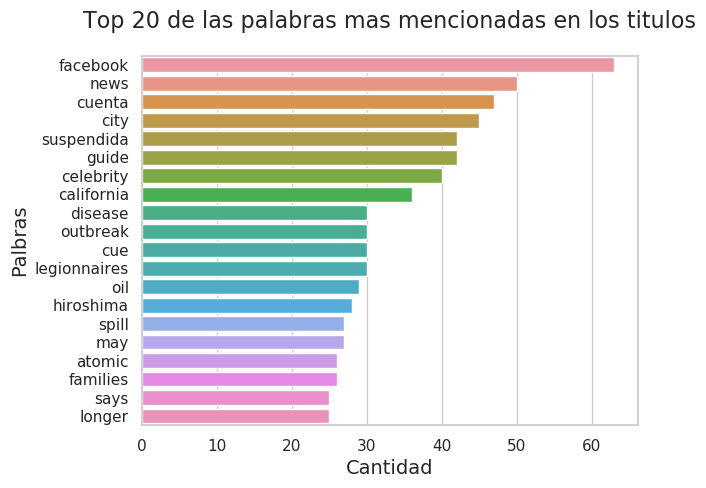

In [136]:
words_top_20 = total_header_words.sort_values('count', ascending=False).head(20).reset_index()
g = sns.barplot(x = 'count', y = 'word', data=words_top_20)
g.set_title("Top 20 de las palabras mas mencionadas en los titulos", fontsize=16, pad=20)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Palbras", fontsize=14)

Text(0, 0.5, 'Palabras')

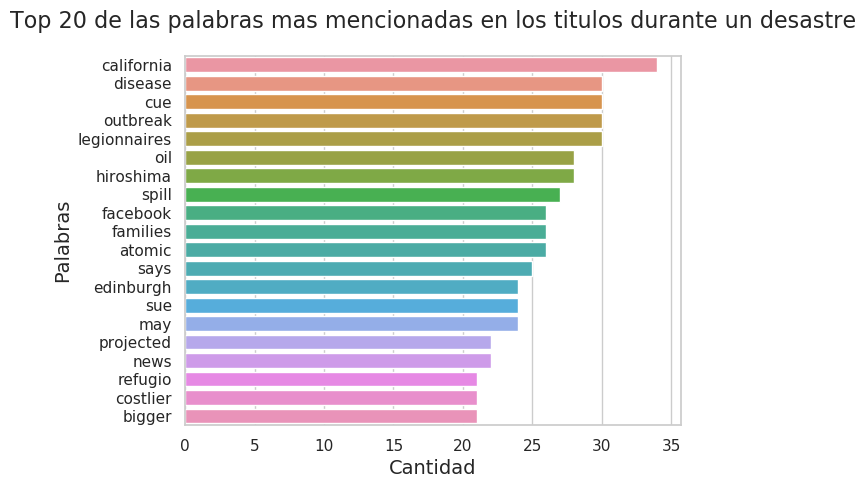

In [142]:
words_top_20 = disaster_header_words.sort_values('count', ascending=False).head(20).reset_index()
g = sns.barplot(x = 'count', y = 'word', data=words_top_20)
g.set_title("Top 20 de las palabras mas mencionadas en los titulos durante un desastre", fontsize=16, pad=20)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Palabras", fontsize=14)

Text(0, 0.5, 'Palabras')

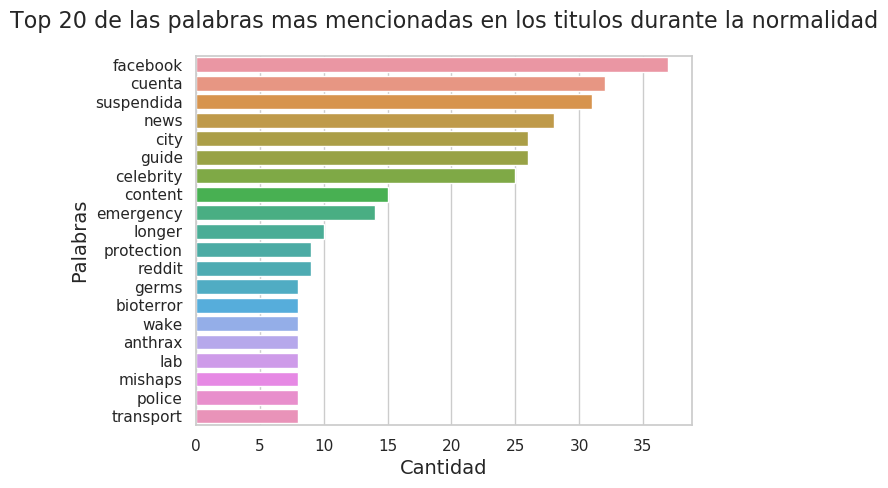

In [141]:
words_top_20 = normal_header_words.sort_values('count', ascending=False).head(20).reset_index()
g = sns.barplot(x = 'count', y = 'word', data=words_top_20)
g.set_title("Top 20 de las palabras mas mencionadas en los titulos durante la normalidad", fontsize=16, pad=20)
g.set_xlabel("Cantidad", fontsize=14)
g.set_ylabel("Palabras", fontsize=14)

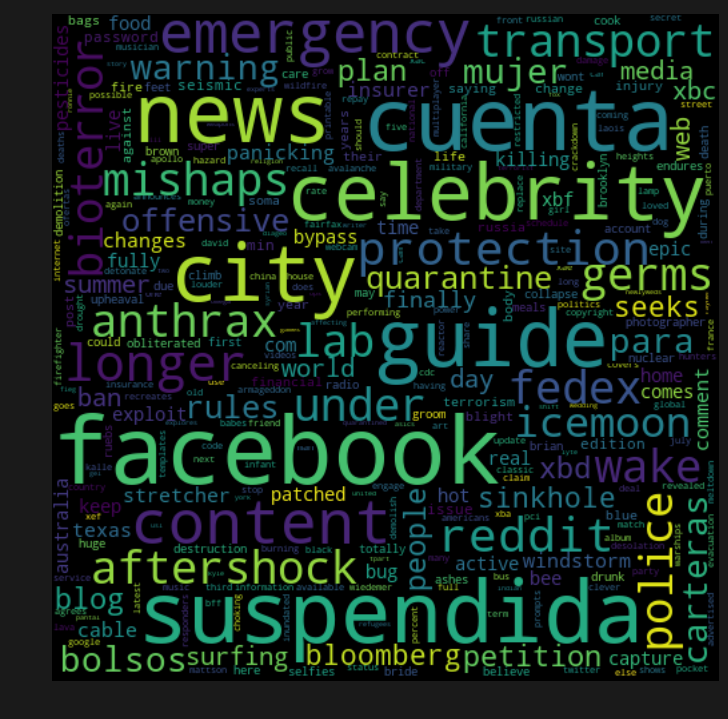

In [143]:
#palabras mas usadas en tweets no tienen que ver con desastres reales
wordcloud = WordCloud(width = 500, height = 500, min_font_size = 5, max_font_size = 70, max_words = 1000, 
                      background_color = 'black', stopwords = list_stopwords).generate_from_frequencies(normal_word_count)
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

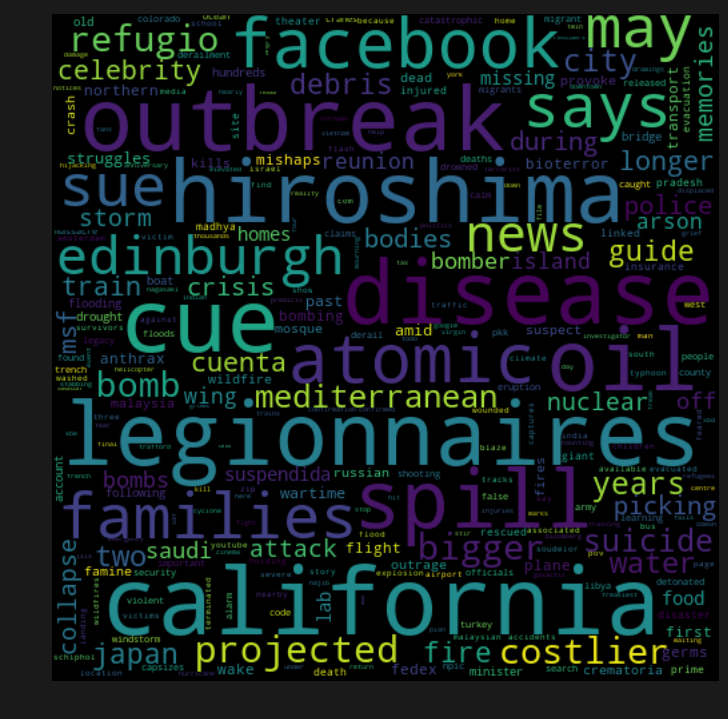

In [145]:
#palabras mas usadas en tweets no tienen que ver con desastres reales
wordcloud = WordCloud(width = 500, height = 500, min_font_size = 5, max_font_size = 70, max_words = 1000, 
                      background_color = 'black', stopwords = list_stopwords)\
                        .generate_from_frequencies(disaster_word_count)
fig = plt.figure(
    figsize = (10, 7),
    facecolor = 'k')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Text(0.5, 0, 'Cantidad de apariciones')

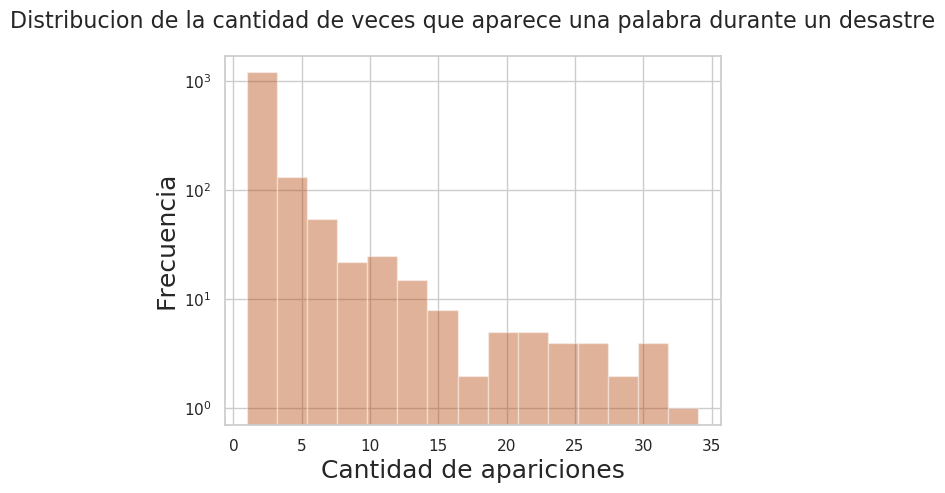

In [149]:
g = sns.distplot(list(disaster_word_count.values()), hist=True, kde=False, bins=15, color=disaster_color)
g.set_title('Distribucion de la cantidad de veces que aparece una palabra durante un desastre',\
            fontsize=16, pad=20)
g.set_ylabel('Frecuencia', fontsize=18)
g.set_yscale('log')
g.set_xlabel('Cantidad de apariciones', fontsize=18)

Text(0.5, 0, 'Cantidad de apariciones')

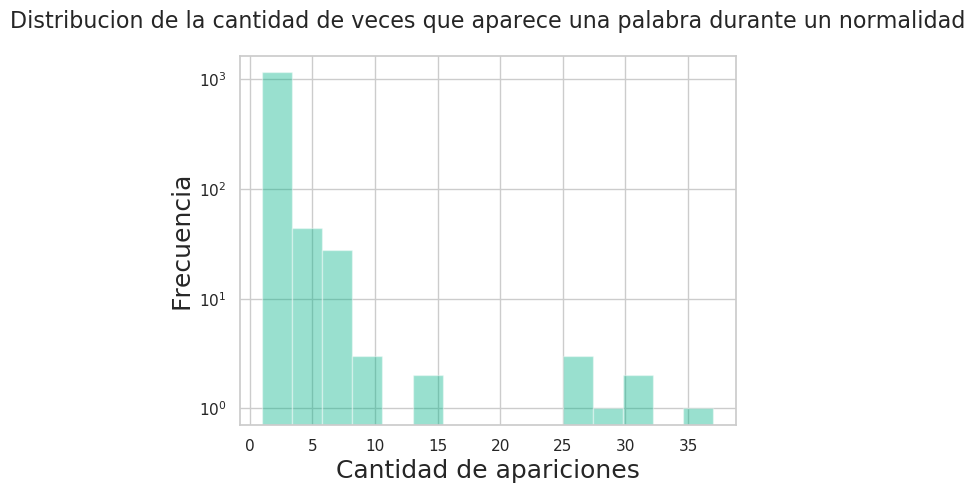

In [151]:
g = sns.distplot(list(normal_word_count.values()), hist=True, kde=False, bins=15, color=normal_color)
g.set_title('Distribucion de la cantidad de veces que aparece una palabra durante un normalidad',\
            fontsize=16, pad=20)
g.set_ylabel('Frecuencia', fontsize=18)
g.set_yscale('log')
g.set_xlabel('Cantidad de apariciones', fontsize=18)